# 1.1 Wave Extraction

predicting the price of the next candle without considering the broader market context and trends is not a reliable or effective approach to trading. This is because markets are inherently volatile and unpredictable, and a single candlestick pattern or prediction may not accurately reflect the overall market sentiment or direction.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

def extract_waves(data):
    # Placeholder function for wave extraction
    # Implement linear least squares and trend detection logic
    waves = []

    for i in range(0, len(data)-1):
        x = np.arange(len(data.iloc[i:i+2]))
        y_high = data['High'][i:i+2].values
        y_low = data['Low'][i:i+2].values

        model_high = LinearRegression().fit(x.reshape(-1, 1), y_high)
        model_low = LinearRegression().fit(x.reshape(-1, 1), y_low)

        slope_high = model_high.coef_[0]
        slope_low = model_low.coef_[0]

        waves.append({
            'num_candles': len(x),
            'high_last': y_high[-1],
            'low_last': y_low[-1],
            'avg_high_low': (y_high.mean() + y_low.mean()) / 2,
            'slope_high': slope_high,
            'slope_low': slope_low
        })

    return pd.DataFrame(waves)


In [ ]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib
import talib as ta

--2024-06-10 10:19:46--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2024-06-10 10:19:46--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://psychz.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz?viasf=1 [following]
--2024-06-10 10:19:46--  http://psychz.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz?viasf=1
Resolving p

In [ ]:
import pandas as pd

In [ ]:
# Example usage
data = pd.read_csv('/content/DAT_MT_XAUUSD_M1_202404.csv')

In [ ]:
data

,2024.04.12,00:00,2384.095000,2384.175000,2383.435000,2383.545000,0
0,2024.04.12,00:01,2383.545,2384.105,2383.545,2383.848,0
1,2024.04.12,00:02,2383.845,2384.195,2383.498,2383.555,0
2,2024.04.12,00:03,2383.555,2383.595,2383.214,2383.315,0
3,2024.04.12,00:04,2383.395,2383.395,2382.898,2383.065,0
4,2024.04.12,00:05,2383.195,2383.765,2382.805,2382.825,0
...,...,...,...,...,...,...,...
27232,2024.04.23,23:54,2327.085,2327.155,2326.845,2326.855,0
27233,2024.04.23,23:55,2326.855,2326.945,2326.535,2326.685,0
27234,2024.04.23,23:56,2326.685,2327.595,2326.495,2327.465,0
27235,2024.04.23,23:57,2327.405,2327.755,2327.175,2327.725,0


In [ ]:
# Load the dataset
def load_data(file_path):
    data = pd.read_csv(file_path)
    data.columns = ['Date', 'Time', 'Open', 'High', 'Low', 'Close', 'Volume']
    data['Datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], format='%Y.%m.%d %H:%M')
    data.set_index('Datetime', inplace=True)
    data.drop(['Date', 'Time'], axis=1, inplace=True)
    return data
data= load_data("/content/DAT_MT_XAUUSD_M1_202404.csv")

In [ ]:
data

,Open,High,Low,Close,Volume
Datetime,,,,,
2024-04-12 00:01:00,2383.545,2384.105,2383.545,2383.848,0
2024-04-12 00:02:00,2383.845,2384.195,2383.498,2383.555,0
2024-04-12 00:03:00,2383.555,2383.595,2383.214,2383.315,0
2024-04-12 00:04:00,2383.395,2383.395,2382.898,2383.065,0
2024-04-12 00:05:00,2383.195,2383.765,2382.805,2382.825,0
...,...,...,...,...,...
2024-04-23 23:54:00,2327.085,2327.155,2326.845,2326.855,0
2024-04-23 23:55:00,2326.855,2326.945,2326.535,2326.685,0
2024-04-23 23:56:00,2326.685,2327.595,2326.495,2327.465,0


# the wave data at certain time points or locations is used to predict the wave data at future time points or other locations.

does this time frame dataset are different

conversion of raw data into wave data


 dividing the data into wave series

Indicators of the last candle of the wave: This set of data includes 16 features that describe the last candle of the wave. These features are likely technical indicators such as moving averages, relative strength index (RSI), Bollinger Bands, and other metrics that are commonly used in technical analysis to analyze and predict market trends.
Average of the indicators of the wave: This set of data includes the average of the same 16 indicators over the entire wave. This means that you are capturing the overall trend and pattern of the wave by averaging the indicators over the entire wave, rather than just focusing on the last candle.

Price data features: These are 7 features that are directly related to the price data, such as the number of candles in a wave, the high and low of the last candle, the average of the high and low of a wave, and the slope of the upper and lower lines. These features are used to capture the price movements and trends in the data.
Financial features: These are 32 features that are derived from various financial indicators, such as moving averages, relative strength index (RSI), Bollinger Bands, and other technical indicators commonly used in financial analysis. These features are used to capture the broader market trends and patterns that influence the price movements.

The fixed contract size ensures that the model is consistently trading with a specific amount of capital, which helps to maintain a consistent level of profitability.

In [ ]:
import numpy as np
def extract_waves(data):
    waves = []

    for i in range(0, len(data)-1):
        x = np.arange(len(data.iloc[i:i+2]))
        y_high = data['High'][i:i+2].values
        y_low = data['Low'][i:i+2].values

        model_high = LinearRegression().fit(x.reshape(-1, 1), y_high)
        model_low = LinearRegression().fit(x.reshape(-1, 1), y_low)

        slope_high = model_high.coef_[0]
        slope_low = model_low.coef_[0]

        waves.append({
            'num_candles': len(x),
            'high_last': y_high[-1],
            'low_last': y_low[-1],
            'avg_high_low': (y_high.mean() + y_low.mean()) / 2,
            'slope_high': slope_high,
            'slope_low': slope_low
        })

    return pd.DataFrame(waves)
waves = extract_waves(data)

In [ ]:
# new


def compute_indicators(df):
    df['macd'], df['macdsignal'], df['macdhist'] = ta.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
    df['ema'] = ta.EMA(df['Close'], timeperiod=12)
    df['sma'] = ta.SMA(df['Close'], timeperiod=12)
    df['adx'] = ta.ADX(df['High'], df['Low'], df['Close'], timeperiod=14)
    df['rsi'] = ta.RSI(df['Close'], timeperiod=14)
    df['stoch_k'], df['stoch_d'] = ta.STOCH(df['High'], df['Low'], df['Close'], fastk_period=14, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)
    df['williams_r'] = ta.WILLR(df['High'], df['Low'], df['Close'], timeperiod=14)
    df['bollinger_hband'], df['bollinger_mband'], df['bollinger_lband'] = ta.BBANDS(df['Close'], timeperiod=20, nbdevup=2, nbdevdn=2)

    # Calculate the Keltner Channel
    df['keltner_ema'] = ta.EMA(df['Close'], timeperiod=20)
    df['keltner_atr'] = ta.ATR(df['High'], df['Low'], df['Close'], timeperiod=20)
    df['keltner_upper'] = df['keltner_ema'] + (df['keltner_atr'] * 2)
    df['keltner_lower'] = df['keltner_ema'] - (df['keltner_atr'] * 2)

    return df

def feature_engineering(waves, data):
    data_with_indicators = compute_indicators(data)
    features = waves.copy()

    for col in ['macd', 'ema', 'sma', 'adx', 'rsi', 'stoch_k', 'stoch_d', 'williams_r', 'bollinger_hband', 'bollinger_lband', 'keltner_ema', 'keltner_upper', 'keltner_lower']:
        features[f'{col}_last'] = data_with_indicators[col].iloc[-1]
        features[f'{col}_avg'] = data_with_indicators[col].mean()

    return features

# Example usage
features = feature_engineering(waves, data)

In [ ]:
features

[{'macd_last': nan,
  'macd_avg': nan,
  'ema_last': nan,
  'ema_avg': nan,
  'sma_last': nan,
  'sma_avg': nan,
  'adx_last': nan,
  'adx_avg': nan,
  'rsi_last': nan,
  'rsi_avg': nan,
  'stoch_k_last': nan,
  'stoch_k_avg': nan,
  'stoch_d_last': nan,
  'stoch_d_avg': nan,
  'williams_r_last': nan,
  'williams_r_avg': nan,
  'bollinger_hband_last': nan,
  'bollinger_hband_avg': nan,
  'bollinger_lband_last': nan,
  'bollinger_lband_avg': nan,
  'keltner_ema_last': nan,
  'keltner_ema_avg': nan,
  'keltner_upper_last': nan,
  'keltner_upper_avg': nan,
  'keltner_lower_last': nan,
  'keltner_lower_avg': nan},
 {'macd_last': nan,
  'macd_avg': nan,
  'ema_last': nan,
  'ema_avg': nan,
  'sma_last': nan,
  'sma_avg': nan,
  'adx_last': nan,
  'adx_avg': nan,
  'rsi_last': nan,
  'rsi_avg': nan,
  'stoch_k_last': nan,
  'stoch_k_avg': nan,
  'stoch_d_last': nan,
  'stoch_d_avg': nan,
  'williams_r_last': nan,
  'williams_r_avg': nan,
  'bollinger_hband_last': nan,
  'bollinger_hband_avg'

In [ ]:
import pandas as pd

def compute_indicators(df):
    df['macd'], df['macdsignal'], df['macdhist'] = ta.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
    df['ema'] = ta.EMA(df['Close'], timeperiod=12)
    df['sma'] = ta.SMA(df['Close'], timeperiod=12)
    df['adx'] = ta.ADX(df['High'], df['Low'], df['Close'], timeperiod=14)
    df['rsi'] = ta.RSI(df['Close'], timeperiod=14)
    df['stoch_k'], df['stoch_d'] = ta.STOCH(df['High'], df['Low'], df['Close'], fastk_period=14, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)
    df['williams_r'] = ta.WILLR(df['High'], df['Low'], df['Close'], timeperiod=14)
    df['bollinger_hband'], df['bollinger_mband'], df['bollinger_lband'] = ta.BBANDS(df['Close'], timeperiod=20, nbdevup=2, nbdevdn=2)

    # Calculate Keltner Channel
    df['keltner_upper'] = df['Close'] + (2 * df['Close'].rolling(window=20).std())
    df['keltner_middle'] = df['Close']
    df['keltner_lower'] = df['Close'] - (2 * df['Close'].rolling(window=20).std())

    df['avg_high_low'] = (df['High'] + df['Low']) / 2
    df['avg_low'] = df['Low'].rolling(window=14).mean()
    df['sma_f'] = ta.SMA(df['Close'], timeperiod=12)
    df['sma_s'] = ta.SMA(df['Close'], timeperiod=26)
    df['slope_high'] = (df['High'].rolling(window=14).mean() - df['High'].shift(1)).rolling(window=14).mean()
    df['slope_low'] = (df['Low'].rolling(window=14).mean() - df['Low'].shift(1)).rolling(window=14).mean()
    return df

def feature_engineering(waves, data):
    data_with_indicators = compute_indicators(data)
    features = waves.copy()

    for col in ['macd', 'macdsignal', 'macdhist', 'ema', 'sma', 'adx', 'rsi', 'stoch_k', 'stoch_d', 'williams_r', 'bollinger_hband', 'bollinger_mband', 'bollinger_lband', 'keltner_upper', 'keltner_middle', 'keltner_lower', 'avg_high_low', 'avg_low', 'sma_f', 'sma_s', 'slope_high', 'slope_low']:
        features[f'{col}_last'] = data_with_indicators[col].iloc[-1]
        features[f'{col}_avg'] = data_with_indicators[col].mean()

    return features

# Example usage

waves = extract_waves(data)
features = feature_engineering(waves, data)

In [ ]:


def compute_indicators(df):
    df['macd'], df['macdsignal'], df['macdhist'] = ta.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
    df['ema'] = ta.EMA(df['Close'], timeperiod=12)
    df['sma'] = ta.SMA(df['Close'], timeperiod=12)
    df['adx'] = ta.ADX(df['High'], df['Low'], df['Close'], timeperiod=14)
    df['rsi'] = ta.RSI(df['Close'], timeperiod=14)
    df['stoch_k'], df['stoch_d'] = ta.STOCH(df['High'], df['Low'], df['Close'], fastk_period=14, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)
    df['williams_r'] = ta.WILLR(df['High'], df['Low'], df['Close'], timeperiod=14)
    df['bollinger_hband'], df['bollinger_mband'], df['bollinger_lband'] = ta.BBANDS(df['Close'], timeperiod=20, nbdevup=2, nbdevdn=2)
    return df

def feature_engineering(waves, data):
    data_with_indicators = compute_indicators(data)
    features = waves.copy()

    for col in ['macd', 'ema', 'sma', 'adx', 'rsi', 'stoch_k', 'stoch_d', 'williams_r', 'bollinger_hband', 'bollinger_lband']:
        features[f'{col}_last'] = data_with_indicators[col].iloc[-1]
        features[f'{col}_avg'] = data_with_indicators[col].mean()

    return features

# Example usage

waves = extract_waves(data)
features = feature_engineering(waves, data)


In [ ]:
features

,num_candles,high_last,low_last,avg_high_low,slope_high,slope_low,macd_last,macd_avg,macdsignal_last,macdsignal_avg,...,avg_low_last,avg_low_avg,sma_f_last,sma_f_avg,sma_s_last,sma_s_avg,slope_high_last,slope_high_avg,slope_low_last,slope_low_avg
0,2,2384.195,2383.498,2383.83575,0.09,-0.047,0.822885,-0.0152,0.682755,-0.015179,...,2326.186429,2334.270099,2326.744167,2334.748449,2325.676923,2334.738022,-0.865204,0.011907,-0.767663,0.011886
1,2,2383.595,2383.214,2383.62550,-0.60,-0.284,0.822885,-0.0152,0.682755,-0.015179,...,2326.186429,2334.270099,2326.744167,2334.748449,2325.676923,2334.738022,-0.865204,0.011907,-0.767663,0.011886
2,2,2383.395,2382.898,2383.27550,-0.20,-0.316,0.822885,-0.0152,0.682755,-0.015179,...,2326.186429,2334.270099,2326.744167,2334.748449,2325.676923,2334.738022,-0.865204,0.011907,-0.767663,0.011886
3,2,2383.765,2382.805,2383.21575,0.37,-0.093,0.822885,-0.0152,0.682755,-0.015179,...,2326.186429,2334.270099,2326.744167,2334.748449,2325.676923,2334.738022,-0.865204,0.011907,-0.767663,0.011886
4,2,2383.355,2382.685,2383.15250,-0.41,-0.120,0.822885,-0.0152,0.682755,-0.015179,...,2326.186429,2334.270099,2326.744167,2334.748449,2325.676923,2334.738022,-0.865204,0.011907,-0.767663,0.011886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27231,2,2327.155,2326.845,2326.91250,-0.04,0.390,0.822885,-0.0152,0.682755,-0.015179,...,2326.186429,2334.270099,2326.744167,2334.748449,2325.676923,2334.738022,-0.865204,0.011907,-0.767663,0.011886
27232,2,2326.945,2326.535,2326.87000,-0.21,-0.310,0.822885,-0.0152,0.682755,-0.015179,...,2326.186429,2334.270099,2326.744167,2334.748449,2325.676923,2334.738022,-0.865204,0.011907,-0.767663,0.011886
27233,2,2327.595,2326.495,2326.89250,0.65,-0.040,0.822885,-0.0152,0.682755,-0.015179,...,2326.186429,2334.270099,2326.744167,2334.748449,2325.676923,2334.738022,-0.865204,0.011907,-0.767663,0.011886
27234,2,2327.755,2327.175,2327.25500,0.16,0.680,0.822885,-0.0152,0.682755,-0.015179,...,2326.186429,2334.270099,2326.744167,2334.748449,2325.676923,2334.738022,-0.865204,0.011907,-0.767663,0.011886


In [ ]:
import pandas as pd

# Assuming your data is in a DataFrame named 'df'
# Split the data into training, validation, and test sets
train_size = int(0.8 * len(features))
val_size = int(0.1 * len(features))
test_size = len(features) - train_size - val_size

train_data = features.iloc[:train_size]
val_data = features.iloc[train_size:train_size + val_size]
test_data = features.iloc[train_size + val_size:]

# Save the data to separate files
train_data.to_csv('train_data.csv', index=False)
val_data.to_csv('val_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)

# 1.2 Feature Engineering

# Building the Transformer Model

X_train_seq shape: (21764, 24, 49)
X_val_seq shape: (2699, 24, 49)
X_test_seq shape: (2701, 24, 49)
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 24, 49)]             0         []                            
                                                                                                  
 multi_head_attention_1 (Mu  (None, 24, 49)               9601      ['input_2[0][0]',             
 ltiHeadAttention)                                                   'input_2[0][0]']             
                                                                                                  
 layer_normalization_1 (Lay  (None, 24, 49)               98        ['multi_head_attention_1[0][0]
 erNormalization)                                                   ']                     

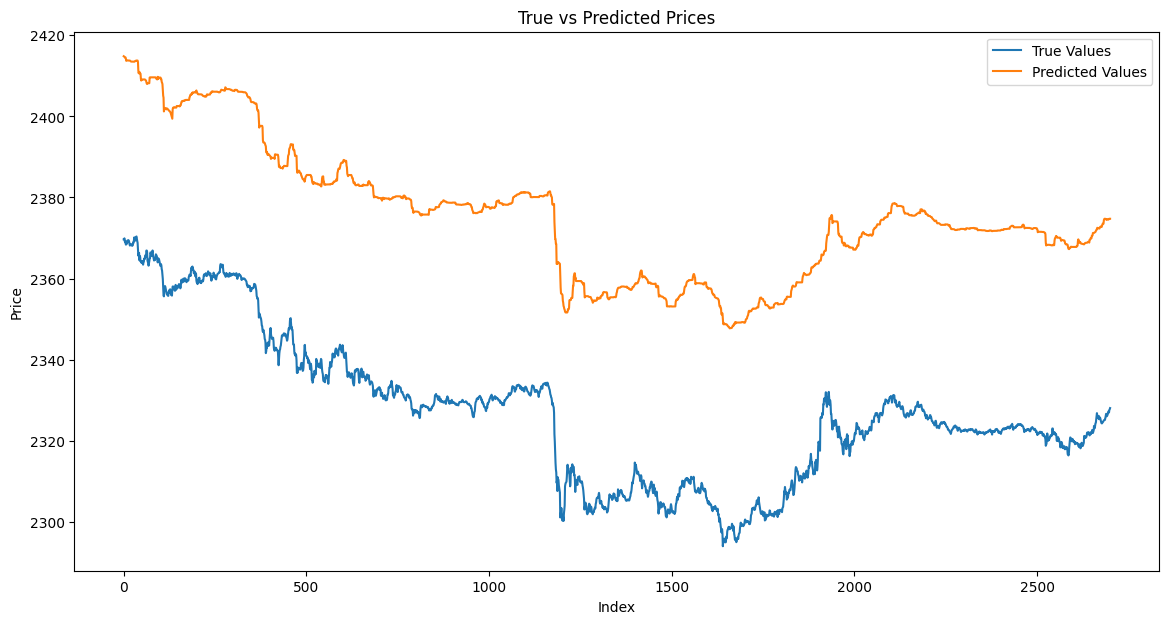

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

# Assuming train_data, val_data, and test_data are pre-defined Pandas DataFrames

# Function to create sequences
def create_sequences(data, target, sequence_length):
    sequences = []
    targets = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i + sequence_length])
        targets.append(target[i + sequence_length])
    return np.array(sequences), np.array(targets)

# Separate features and target variable
X_train = train_data.drop(columns=['high_last']).values
y_train = train_data['high_last'].values
X_val = val_data.drop(columns=['high_last']).values
y_val = val_data['high_last'].values
X_test = test_data.drop(columns=['high_last']).values
y_test = test_data['high_last'].values

# Set sequence length
sequence_length = 24

# Create sequences
X_train_seq, y_train_seq = create_sequences(X_train, y_train, sequence_length)
X_val_seq, y_val_seq = create_sequences(X_val, y_val, sequence_length)
X_test_seq, y_test_seq = create_sequences(X_test, y_test, sequence_length)

# Check the shape of the sequences
print(f"X_train_seq shape: {X_train_seq.shape}")
print(f"X_val_seq shape: {X_val_seq.shape}")
print(f"X_test_seq shape: {X_test_seq.shape}")

# Assuming feature count based on your data
feature_count = X_train_seq.shape[2]

# Define the model architecture
input_shape = (sequence_length, feature_count)
inputs = layers.Input(shape=input_shape)

# Layer Normalization and Multi-Head Attention
x = layers.MultiHeadAttention(num_heads=8, key_dim=feature_count // 8)(inputs, inputs)
x = layers.LayerNormalization()(x)

# Convolutional layers with SELU activation and same padding
conv1 = layers.Conv1D(filters=32, kernel_size=3, dilation_rate=1, activation='selu', padding='same')(x)
conv2 = layers.Conv1D(filters=32, kernel_size=3, dilation_rate=2, activation='selu', padding='same')(conv1)
conv3 = layers.Conv1D(filters=32, kernel_size=3, dilation_rate=2, activation='selu', padding='same')(conv2)
conv4 = layers.Conv1D(filters=32, kernel_size=3, dilation_rate=2, activation='selu', padding='same')(conv3)
conv5 = layers.Conv1D(filters=32, kernel_size=3, dilation_rate=4, activation='selu', padding='same')(conv4)

# Dropout layers
dropout4 = layers.Dropout(0.2)(conv4)
dropout5 = layers.Dropout(0.4)(conv5)
dropout5_final = layers.Dropout(0.5)(conv5)

# Concatenation of convolutional layers
concatenated = layers.Concatenate()([conv1, dropout4, dropout5_final])

# Global Average Pooling
gap = layers.GlobalAveragePooling1D()(concatenated)

# MLP with 1 layer of 32 nodes with ReLU activation
mlp = layers.Dense(32, activation='relu')(gap)

# Output layer with 1 node (since we are predicting a single value)
outputs = layers.Dense(1, activation='linear')(mlp)

# Create model
model = models.Model(inputs=inputs, outputs=outputs)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, clipnorm=1.0)

# Compile the model
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

# Print model summary
model.summary()

# Train the model
history = model.fit(X_train_seq, y_train_seq, epochs=10, batch_size=32, validation_data=(X_val_seq, y_val_seq))

# Evaluate the model
train_loss, train_mae = model.evaluate(X_train_seq, y_train_seq)
val_loss, val_mae = model.evaluate(X_val_seq, y_val_seq)
test_loss, test_mae = model.evaluate(X_test_seq, y_test_seq)

print(f'Train MAE: {train_mae}, Validation MAE: {val_mae}, Test MAE: {test_mae}')

# Make predictions
y_pred_train = model.predict(X_train_seq)
y_pred_val = model.predict(X_val_seq)
y_pred_test = model.predict(X_test_seq)

# Visualize the predictions
plt.figure(figsize=(14, 7))
plt.plot(y_test_seq, label='True Values')
plt.plot(y_pred_test, label='Predicted Values')
plt.legend()
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('True vs Predicted Prices')
plt.show()

# Save the prepared datasets
train_data.to_csv('train_data.csv', index=False)
val_data.to_csv('val_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)

# Save the model
model.save('stock_price_prediction_model.h5')


# visuliazation

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, LayerNormalization, MultiHeadAttention, Flatten
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Assuming 'features' and 'target_values' are already defined as per previous steps
# features, target_values should be the output of feature_engineering_and_targets function

# Dummy data for example purposes, replace with actual data
# features = np.random.rand(1000, 20)  # Replace with actual feature array
# target_values = np.random.rand(1000, 2)  # Replace with actual target values

# Prepare data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(features_scaled, target_values, test_size=0.2, random_state=42)

# Define the Transformer model
def build_transformer_model(input_shape):
    inputs = Input(shape=input_shape)
    x = LayerNormalization(epsilon=1e-6)(inputs)

    # Transformer Encoder block
    attn_output = MultiHeadAttention(num_heads=8, key_dim=64)(x, x)
    attn_output = Dropout(0.1)(attn_output)
    x = LayerNormalization(epsilon=1e-6)(attn_output + x)

    # Feedforward layer
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.1)(x)

    # Flatten the output to feed into the Dense output layer
    x = Flatten()(x)

    outputs = Dense(2)(x)  # Predicting two values: slopes of the upper and lower lines

    model = Model(inputs, outputs)
    return model

input_shape = (features_scaled.shape[1],)
model = build_transformer_model(input_shape)

model.compile(optimizer='adam', loss='mse')
model.summary()

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')


TypeError: Singleton array array(Ellipsis, dtype=object) cannot be considered a valid collection.